https://www.gymlibrary.ml/

In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [2]:
def sorted_alphanumeric(data):
  convert = lambda text: int(text) if text.isdigit() else text.lower()
  alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
  return sorted(data, key=alphanum_key)

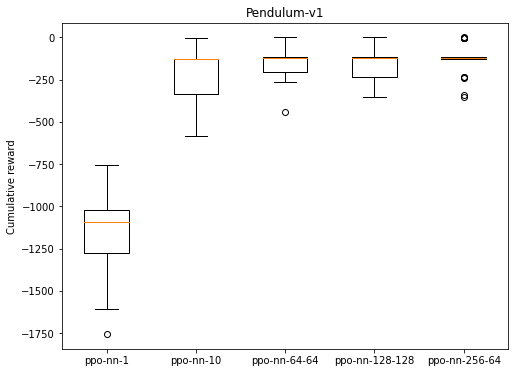

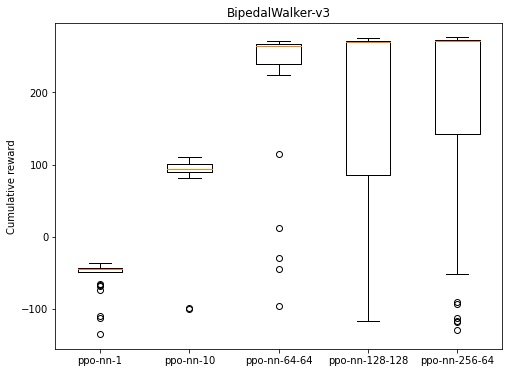

In [3]:
envs = ["Pendulum-v1", "BipedalWalker-v3"]
names = ["ppo_pendulum", "ppo_bipedalwalker"]

for name, env_name in zip(names, envs):
  title = env_name
  labels = []
  hist = []

  for d in sorted_alphanumeric(os.listdir("exps/")):
    env = make_vec_env(env_name)
    model = PPO.load(os.path.join("exps", d, name))
    labels.append(d)

    nb_tests = 30
    rewards = np.zeros(nb_tests)
    for i in range(nb_tests):
      cum_reward = 0
      obs = env.reset()
      done = False
      steps = 0
      while not done:
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        #env.render()
        cum_reward += reward[0]
        steps += 1
      rewards[i] = cum_reward
    hist.append(rewards)
  plt.figure(figsize=(8, 6))
  plt.boxplot(hist, labels=labels)
  plt.ylabel("Cumulative reward")
  plt.title(title)
  plt.show()